In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv


In [2]:
d = pd.read_csv("data.csv")
df = pd.DataFrame(d)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [3]:
#handling non-numerical values 
new_df = pd.get_dummies(df)

new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0


In [4]:
# this is equivalent to the training portion of the tensors

y = new_df["HeartDisease"]
x = new_df.drop(columns=["HeartDisease"])

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [5]:
#Scaling the data
Scaler = StandardScaler()
X_Scaler = Scaler.fit(X_train)
X_train_scaled = X_Scaler.transform(X_train)
X_test_scaled = X_Scaler.transform(X_test)

In [6]:
# layers 
nn = tf.keras.models.Sequential()

nn.add(tf.keras.layers.Dense(units=3, activation="tanh", input_dim=20)) #initial layers

nn.add(tf.keras.layers.Dense(units=7, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=7, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=7, activation="tanh"))

nn.add(tf.keras.layers.Dense(units=1, activation="tanh")) #add final layer of 1

nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 63        
                                                                 
 dense_1 (Dense)             (None, 7)                 28        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 7)                 56        
                                                                 
 dense_4 (Dense)             (None, 1)                 8         
                                                                 
Total params: 211 (844.00 Byte)
Trainable params: 211 (844.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
#SGD provided poor loss

In [8]:
fit_model = nn.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
22/22 [==============================] - 1s 1ms/step - loss: 6.0609 - accuracy: 0.3052
Epoch 2/100
22/22 [==============================] - 0s 1ms/step - loss: 5.7429 - accuracy: 0.3183
Epoch 3/100
22/22 [==============================] - 0s 1ms/step - loss: 5.4077 - accuracy: 0.3387
Epoch 4/100
22/22 [==============================] - 0s 1ms/step - loss: 5.0368 - accuracy: 0.3430
Epoch 5/100
22/22 [==============================] - 0s 1ms/step - loss: 4.3993 - accuracy: 0.3721
Epoch 6/100
22/22 [==============================] - 0s 902us/step - loss: 2.9701 - accuracy: 0.4142
Epoch 7/100
22/22 [==============================] - 0s 976us/step - loss: 1.1849 - accuracy: 0.5480
Epoch 8/100
22/22 [==============================] - 0s 1ms/step - loss: 0.7199 - accuracy: 0.6090
Epoch 9/100
22/22 [==============================] - 0s 997us/step - loss: 0.6626 - accuracy: 0.6483
Epoch 10/100
22/22 [==============================] - 0s 1ms/step - loss: 0.6370 - accuracy: 0.6613
Epo

22/22 [==============================] - 0s 1ms/step - loss: 0.3857 - accuracy: 0.8576
Epoch 83/100
22/22 [==============================] - 0s 950us/step - loss: 0.3850 - accuracy: 0.8605
Epoch 84/100
22/22 [==============================] - 0s 963us/step - loss: 0.3840 - accuracy: 0.8605
Epoch 85/100
22/22 [==============================] - 0s 950us/step - loss: 0.3843 - accuracy: 0.8605
Epoch 86/100
22/22 [==============================] - 0s 902us/step - loss: 0.3832 - accuracy: 0.8605
Epoch 87/100
22/22 [==============================] - 0s 950us/step - loss: 0.3827 - accuracy: 0.8605
Epoch 88/100
22/22 [==============================] - 0s 902us/step - loss: 0.3825 - accuracy: 0.8605
Epoch 89/100
22/22 [==============================] - 0s 958us/step - loss: 0.3820 - accuracy: 0.8605
Epoch 90/100
22/22 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8619
Epoch 91/100
22/22 [==============================] - 0s 996us/step - loss: 0.3811 - accuracy: 0.86

In [9]:
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.4320 - accuracy: 0.8826 - 132ms/epoch - 16ms/step
Loss: 0.4320298135280609, Accuracy: 0.8826087117195129


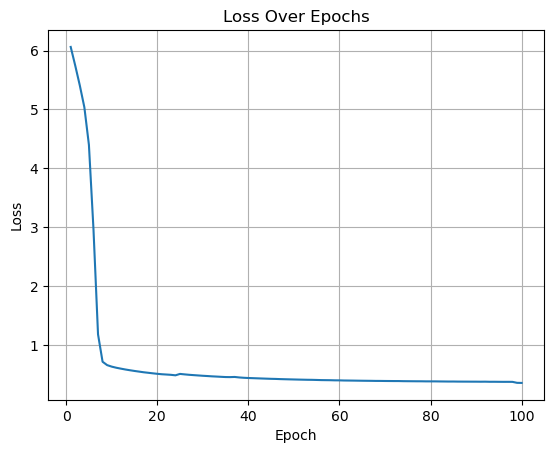

In [10]:
import matplotlib.pyplot as plt

# Extract loss values 
loss_values = fit_model.history['loss']

# Plot the loss over epochs
plt.plot(range(1, len(loss_values) + 1), loss_values)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.grid(True)
plt.show()